In [1]:
!pip install -q tensorflow-gpu==2.0.0-beta1
import tensorflow as tf
print(tf.__version__)

ERROR: Could not find a version that satisfies the requirement tensorflow-gpu==2.0.0-beta1 (from versions: 2.12.0)
ERROR: No matching distribution found for tensorflow-gpu==2.0.0-beta1
2.18.0


In [3]:
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) =  mnist.load_data()
x_train ,x_test = x_train/255.0,x_test/255.0

In [4]:
x_train.shape

(60000, 28, 28)

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10,activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
r = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.8573 - loss: 0.4888 - val_accuracy: 0.9597 - val_loss: 0.1345
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9567 - loss: 0.1444 - val_accuracy: 0.9692 - val_loss: 0.1042
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9672 - loss: 0.1071 - val_accuracy: 0.9757 - val_loss: 0.0834
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9731 - loss: 0.0883 - val_accuracy: 0.9751 - val_loss: 0.0812
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9775 - loss: 0.0704 - val_accuracy: 0.9770 - val_loss: 0.0770
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9796 - loss: 0.0643 - val_accuracy: 0.9749 - val_loss: 0.0823
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9834 - loss: 0.0536 - val_accuracy: 0.9807 - val_loss: 0.0685
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9845 - loss: 0.047

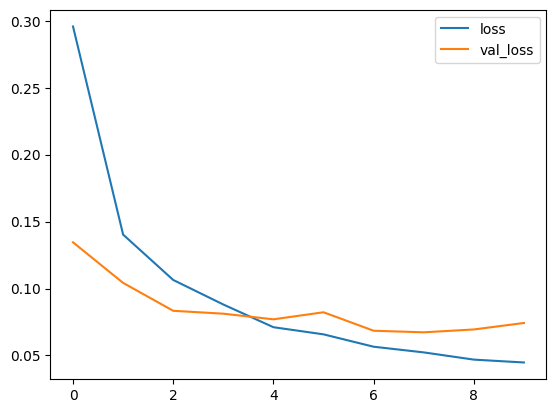

In [10]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

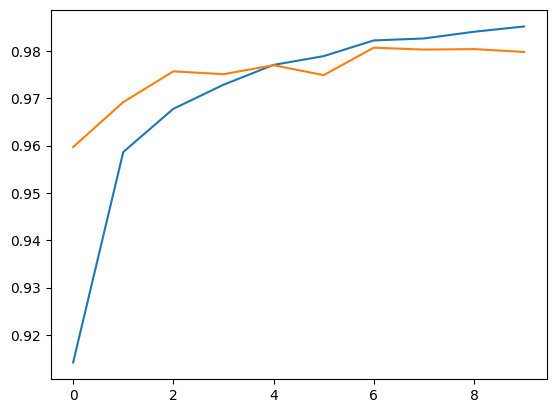

In [11]:
plt.plot(r.history['accuracy'],label='acc')
plt.plot(r.history['val_accuracy'],label='val_acc')

In [13]:
print(model.evaluate(x_test,y_test))



313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9771 - loss: 0.0892
[0.07427501678466797, 0.9797999858856201]


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Confusion Matrix without Normalization
[[ 970    1    3    1    1    0    1    1    2    0]
 [   0 1125    3    1    0    0    2    0    4    0]
 [   4    1 1015    3    1    0    1    6    1    0]
 [   0    0    2  994    0    4    0    5    3    2]
 [   1    0    4    0  961    0    2    3    1   10]
 [   2    0    0   11    1  869    2    1    3    3]
 [   5    3    0    1    3    4  941    0    1    0]
 [   2    5    9    2    0    0    0 1005    1    4]
 [   0    1    1    6    5    5    4    6  942    4]
 [   1    3    0    6   11    3    0    8    1  976]]


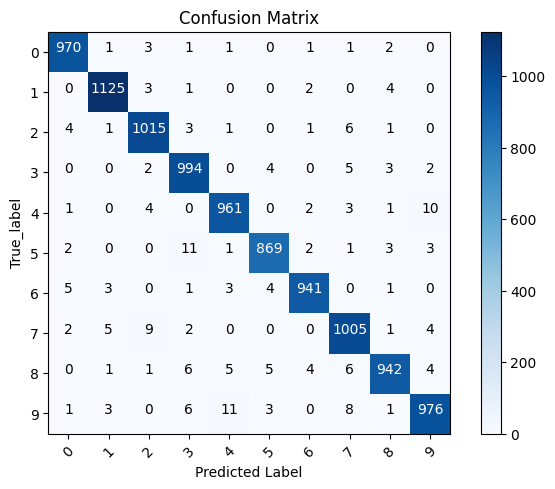

In [19]:
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm,classes,normalize=False,title='Confusion Matrix',cmap=plt.cm.Blues):
  if normalize:
    cm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
    print("Normalized Confusion Matrix")
  else:
    print("Confusion Matrix without Normalization")
  print(cm)
  plt.imshow(cm,interpolation='nearest',cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks=np.arange(len(classes))
  plt.xticks(tick_marks,classes,rotation=45)
  plt.yticks(tick_marks,classes)
  fmt = '.2f' if normalize else 'd'
  thresh = cm.max()/2
  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,format(cm[i,j],fmt),horizontalalignment='center',color='white' if cm[i,j]>thresh else 'black')
  plt.tight_layout()
  plt.ylabel('True_label')
  plt.xlabel('Predicted Label')
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test,p_test)
plot_confusion_matrix(cm,list(range(10)))